Error Types and Frequencies:
     Error Type  Random Testing  Metaheuristic Testing
0       Runtime            5558                   4069
1  Compile-Time             448                    346
2         Other            4058                   2277

Average Code Complexity:
  Code Type  Random Testing  Metaheuristic Testing
0  Original       62.610990             121.258219
1   Changed       62.826411             121.609683

Statistical Test Results:
         Test  Statistic        P-Value
0  Chi-Square  68.289615   1.482855e-15
1      T-Test -36.153129  1.160710e-275


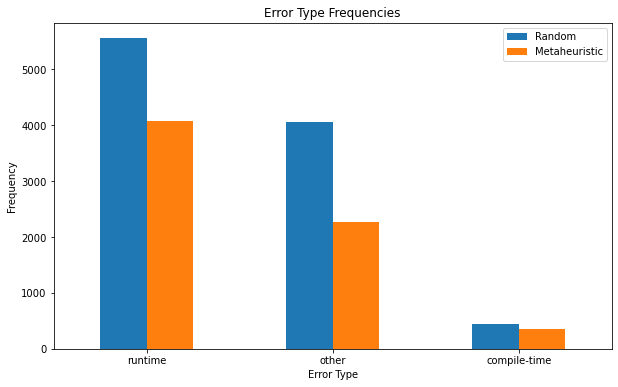

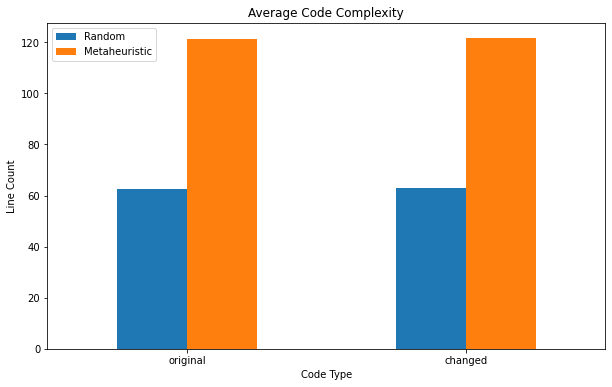

In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from collections import Counter

# Data Cleaning and Feature Extraction Functions
def calculate_code_complexity(code):
    line_count = len(code.split('\n'))
    return {'line_count': line_count}

def extract_features(df):
    df['change_type'] = df['change']
    df['error_type'] = df['error'].apply(lambda x: 'runtime' if x == '0' else 'compile-time' if x == '-11' else 'other')
    df['original_code_complexity'] = df['original_src'].apply(calculate_code_complexity)
    df['changed_code_complexity'] = df['changed_src'].apply(calculate_code_complexity)
    return df

# Load data
test_json_path = 'test.json'
train_json_path = 'train.json'

with open(test_json_path, 'r') as file:
    test_json_data = json.load(file)

with open(train_json_path, 'r') as file:
    train_json_data = json.load(file)

test_df = pd.DataFrame(test_json_data)
train_df = pd.DataFrame(train_json_data)

test_df_features = extract_features(test_df)
train_df_features = extract_features(train_df)

# Random Testing Simulation
random_test_subset = test_df_features.sample(frac=0.5, random_state=1)
error_types_random_test = Counter(random_test_subset['error_type'])
average_complexity_random_test = {
    'original': np.mean([c['line_count'] for c in random_test_subset['original_code_complexity']]),
    'changed': np.mean([c['line_count'] for c in random_test_subset['changed_code_complexity']])
}

# Metaheuristic-Based Testing Simulation
average_complexity_threshold = np.mean([c['line_count'] for c in test_df_features['original_code_complexity']])
metaheuristic_test_subset = test_df_features[test_df_features['original_code_complexity'].apply(lambda x: x['line_count'] > average_complexity_threshold)]
error_types_metaheuristic_test = Counter(metaheuristic_test_subset['error_type'])
average_complexity_metaheuristic_test = {
    'original': np.mean([c['line_count'] for c in metaheuristic_test_subset['original_code_complexity']]),
    'changed': np.mean([c['line_count'] for c in metaheuristic_test_subset['changed_code_complexity']])
}

# Statistical Analysis
contingency_table = [
    [error_types_random_test['runtime'], error_types_metaheuristic_test['runtime']],
    [error_types_random_test['compile-time'], error_types_metaheuristic_test['compile-time']],
    [error_types_random_test['other'], error_types_metaheuristic_test['other']]
]
chi2, p_value = chi2_contingency(contingency_table)[0:2]

complexity_random_original = [c['line_count'] for c in random_test_subset['original_code_complexity']]
complexity_metaheuristic_original = [c['line_count'] for c in metaheuristic_test_subset['original_code_complexity']]
t_statistic, p_value_complexity = ttest_ind(complexity_random_original, complexity_metaheuristic_original)

# Creating tables for the results
error_types_table = pd.DataFrame({
    'Error Type': ['Runtime', 'Compile-Time', 'Other'],
    'Random Testing': [error_types_random_test['runtime'], error_types_random_test['compile-time'], error_types_random_test['other']],
    'Metaheuristic Testing': [error_types_metaheuristic_test['runtime'], error_types_metaheuristic_test['compile-time'], error_types_metaheuristic_test['other']]
})

complexity_table = pd.DataFrame({
    'Code Type': ['Original', 'Changed'],
    'Random Testing': [average_complexity_random_test['original'], average_complexity_random_test['changed']],
    'Metaheuristic Testing': [average_complexity_metaheuristic_test['original'], average_complexity_metaheuristic_test['changed']]
})

statistical_tests_table = pd.DataFrame({
    'Test': ['Chi-Square', 'T-Test'],
    'Statistic': [chi2, t_statistic],
    'P-Value': [p_value, p_value_complexity]
})

# Displaying the tables
print("Error Types and Frequencies:")
print(error_types_table)
print("\nAverage Code Complexity:")
print(complexity_table)
print("\nStatistical Test Results:")
print(statistical_tests_table)

# Visualization
# Error Type Frequencies
error_types_df = pd.DataFrame([error_types_random_test, error_types_metaheuristic_test], index=['Random', 'Metaheuristic']).T
error_types_df.plot(kind='bar', figsize=(10, 6))
plt.title('Error Type Frequencies')
plt.ylabel('Frequency')
plt.xlabel('Error Type')
plt.xticks(rotation=0)
plt.show()

# Code Complexity Comparison
complexity_df = pd.DataFrame([average_complexity_random_test, average_complexity_metaheuristic_test], index=['Random', 'Metaheuristic']).T
complexity_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Code Complexity')
plt.ylabel('Line Count')
plt.xlabel('Code Type')
plt.xticks(rotation=0)
plt.show()
